In [1]:
import pandas as pd
import pickle
from scipy import stats
import pandas as pd
import seaborn as sns
import pingouin as pg
import statsmodels.formula.api as s
import statsmodels.api as sm
from statsmodels.formula.api import ols


c:\Python310\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
c:\Python310\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
final = pickle.load(open( '../00_data/final/competence.pkl','rb') )

In [3]:
final = final.sort_values(by=['ability'])
n = 10
low_performer = final.head(int(len(final)*(n/100)))

final = final.sort_values(by=['ability'], ascending=False)
high_performer = final.head(int(len(final)*(n/100)))

In [4]:
low_intvcontrol = low_performer[(low_performer['interventiongroup']=='control')]
low_intv2 = low_performer[(low_performer['interventiongroup']=='2')]
low_intv3 = low_performer[(low_performer['interventiongroup']=='3')]
low_intv4 = low_performer[(low_performer['interventiongroup']=='4')]
low_intv5 = low_performer[(low_performer['interventiongroup']=='5')]
low_intv6 = low_performer[(low_performer['interventiongroup']=='6')]

high_intvcontrol = high_performer[(high_performer['interventiongroup']=='control')]
high_intv2 = high_performer[(high_performer['interventiongroup']=='2')]
high_intv3 = high_performer[(high_performer['interventiongroup']=='3')]
high_intv4 = high_performer[(high_performer['interventiongroup']=='4')]
high_intv5 = high_performer[(high_performer['interventiongroup']=='5')]
high_intv6 = high_performer[(high_performer['interventiongroup']=='6')]

[Text(0.5, 0, 'Competence'), Text(0, 0.5, 'Count of users')]

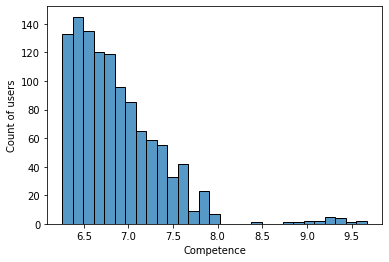

In [8]:
gr = sns.histplot(data=high_performer, x="ability")
gr.set(xlabel ="Competence", ylabel = "Count of users")


[Text(0.5, 0, 'Competence'), Text(0, 0.5, 'Count of users')]

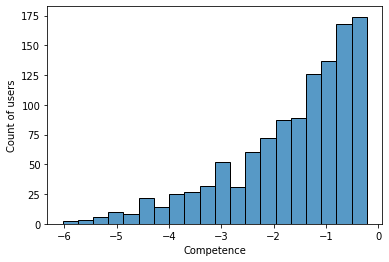

In [9]:
gr=sns.histplot(data=low_performer, x="ability")
gr.set(xlabel ="Competence", ylabel = "Count of users")

Übersicht Effektgroeßen

In [ ]:
ability_by_group = high_performer.groupby(['interventiongroup']).agg({'ability':'median','Geschlecht':'count'})
ability_by_group = ability_by_group.rename(columns={'Geschlecht':'count'})
ability_by_group

,ability,count
interventiongroup,,
2,6.79,197
3,6.80,189
4,6.78,177
5,6.76,153
6,6.76,147
control,6.73,279


In [ ]:
ability_by_group = low_performer.groupby(['interventiongroup']).agg({'ability':'median','Geschlecht':'count'})
ability_by_group = ability_by_group.rename(columns={'Geschlecht':'count'})
ability_by_group

,ability,count
interventiongroup,,
2,-1.110,179
3,-1.135,166
4,-1.285,182
5,-1.650,270
6,-1.475,136
control,-1.170,201


Alle Daten

In [ ]:
# Kruskal Wallis Test 
stats.kruskal(high_intvcontrol['ability'], high_intv2['ability'], high_intv3['ability'],high_intv4['ability'],high_intv5['ability'],high_intv6['ability'])


KruskalResult(statistic=6.507018721646282, pvalue=0.25995928681685565)

In [ ]:
# Kruskal Wallis Test 
stats.kruskal(low_intvcontrol['ability'], low_intv2['ability'], low_intv3['ability'],low_intv4['ability'],low_intv5['ability'],low_intv6['ability'])


KruskalResult(statistic=23.143861844516767, pvalue=0.00031684442303643286)

In [ ]:
#Wilcoxon Mann Whitney Test
print(stats.mannwhitneyu(low_intvcontrol['ability'], low_intv2['ability']))
print(stats.mannwhitneyu(low_intvcontrol['ability'], low_intv3['ability']))
print(stats.mannwhitneyu(low_intvcontrol['ability'], low_intv4['ability']))
print(stats.mannwhitneyu(low_intvcontrol['ability'], low_intv5['ability']))
print(stats.mannwhitneyu(low_intvcontrol['ability'], low_intv6['ability']))


MannwhitneyuResult(statistic=17510.5, pvalue=0.6543591869016049)
MannwhitneyuResult(statistic=15313.0, pvalue=0.175765005931398)
MannwhitneyuResult(statistic=18585.5, pvalue=0.7858207011172688)
MannwhitneyuResult(statistic=31404.0, pvalue=0.003482300885483314)
MannwhitneyuResult(statistic=14830.0, pvalue=0.18559740535116975)


<AxesSubplot:xlabel='ability', ylabel='interventiongroup'>

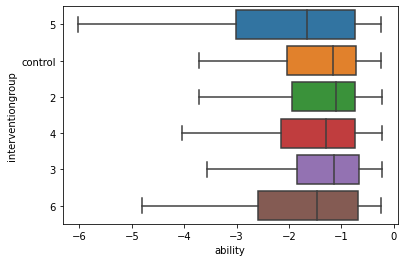

In [ ]:
sns.boxplot(data=low_performer, x="ability", y="interventiongroup",showfliers = False)#,hue='Geschlecht'
